# Libraries

In [7]:
import os
import operator
import functools

import numpy as np
import pandas as pd

from sklearn.manifold import TSNE, smacof
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline, make_union
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, PCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.metrics import pairwise_distances

import holoviews as hv
import hvplot.pandas

from gensim import sklearn_api
from gensim.models import Word2Vec

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
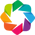

In [8]:
hv.extension('bokeh')
#hv.archive.auto()

# Data

In [9]:
description_path = os.path.join('..','data','Bloomberg_Meta.csv')
description = pd.read_csv(description_path)
description = description.loc[description.CODE.str.contains(' SJ Equity'),:]

description.DESCRIPTION = description.DESCRIPTION.str.lower().str.replace('[^a-z]',' ').str.replace(f"({' | '.join(ENGLISH_STOP_WORDS)})",' ')
description['NAME'] = description.DESCRIPTION.apply(lambda s: ' '.join(s.split()[0:3]))
description = description.reset_index()

# Models

LSI

In [4]:
LSI = make_pipeline(TfidfVectorizer(), TruncatedSVD(n_components=100))
lsi = LSI.fit_transform(description.DESCRIPTION)
lsi_d = pairwise_distances(lsi,metric='euclidean', n_jobs=-1)

In [5]:
lsi_tsne = pd.DataFrame(TSNE(metric='precomputed').fit_transform(lsi_d), columns=['x','y'])
lsi_tsne['companies'] = description['NAME']

lsi_smacof = pd.DataFrame(smacof(lsi_d)[0], columns=['x','y'])
lsi_smacof['companies'] = description['NAME']

:Overlay
   .Scatter.LSI_TSNE :Scatter   [y]   (x,companies)
   .Text.I           :Text   [x,y]
   .Text.II          :Text   [x,y]
   .Text.III         :Text   [x,y]
   .Text.IV          :Text   [x,y]
   .Text.V           :Text   [x,y]
   .Text.VI          :Text   [x,y]
   .Text.VII         :Text   [x,y]
   .Text.VIII        :Text   [x,y]
   .Text.IX          :Text   [x,y]
   .Text.X           :Text   [x,y]
   .Text.XI          :Text   [x,y]
   .Text.XII         :Text   [x,y]
   .Text.XIII        :Text   [x,y]
   .Text.XIV         :Text   [x,y]
   .Text.XV          :Text   [x,y]
   .Text.XVI         :Text   [x,y]
   .Text.XVII        :Text   [x,y]
   .Text.XVIII       :Text   [x,y]
   .Text.XIX         :Text   [x,y]
   .Text.XX          :Text   [x,y]
   .Text.XXI         :Text   [x,y]
   .Text.XXII        :Text   [x,y]
   .Text.XXIII       :Text   [x,y]
   .Text.XXIV        :Text   [x,y]
   .Text.XXV         :Text   [x,y]
   .Text.XXVI        :Text   [x,y]
   .Text.XXVII       :Text   [x,y]
   .Text.XXVIII      :Text   [x,y]
   .Text.XXIX        :Text   [x,y]
   .Text.XXX         :Text   [x,y]
   .Text.XXXI        :Text   [x,y]
   .Text.XXXII       :Text   [x,y]
   .Text.XXXIII      :Text   [x,y]
   .Text.XXXIV       :Text   [x,y]
   .Text.XXXV        :Text   [x,y]
   .Text.XXXVI       :Text   [x,y]
   .Text.XXXVII      :Text   [x,y]
   .Text.XXXVIII     :Text   [x,y]
   .Text.XXXIX       :Text   [x,y]
   .Text.XL          :Text   [x,y]
   .Text.XLI         :Text   [x,y]
   .Text.XLII        :Text   [x,y]
   .Text.XLIII       :Text   [x,y]
   .Text.XLIV        :Text   [x,y]
   .Text.XLV         :Text   [x,y]
   .Text.XLVI        :Text   [x,y]
   .Text.XLVII       :Text   [x,y]
   .Text.XLVIII      :Text   [x,y]
   .Text.XLIX        :Text   [x,y]
   .Text.L           :Text   [x,y]
   .Text.LI          :Text   [x,y]
   .Text.LII         :Text   [x,y]
   .Text.LIII        :Text   [x,y]
   .Text.LIV         :Text   [x,y]
   .Text.LV          :Text   [x,y]
   .Text.LVI         :Text   [x,y]
   .Text.LVII        :Text   [x,y]
   .Text.LVIII       :Text   [x,y]
   .Text.LIX         :Text   [x,y]
   .Text.LX          :Text   [x,y]
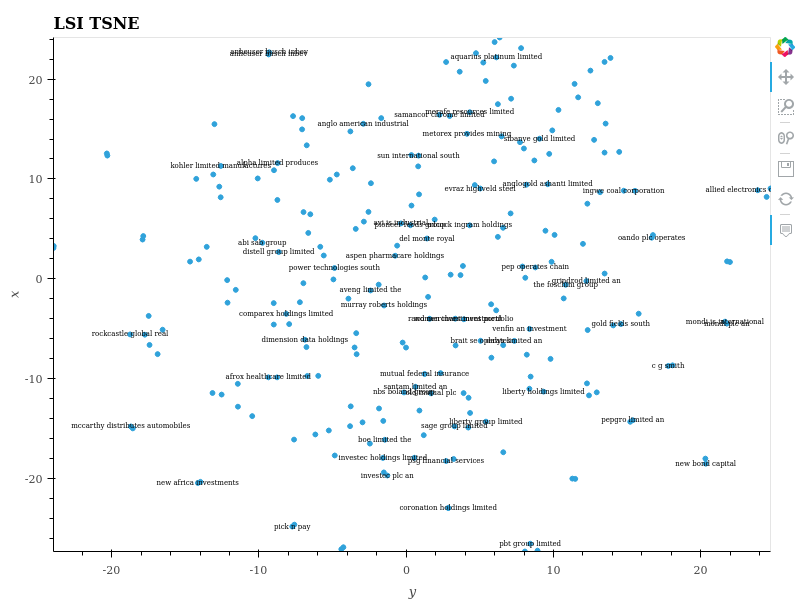

In [6]:
%%opts Scatter [width=800 height=600 tools=['hover']] (size=5)
%%output filename="./media/LSI TSNE" fig="png"
hv.Scatter(lsi_tsne, vdims=['x', 'companies'],kdims=['y'], label='LSI TSNE')*functools.reduce(operator.mul,lsi_tsne.sample(frac=0.25).apply(lambda x: hv.Text(x[1], x[0], x[2],fontsize=5),axis=1))

:Overlay
   .Scatter.LSI_SMACOF :Scatter   [y]   (x,companies)
   .Text.I             :Text   [x,y]
   .Text.II            :Text   [x,y]
   .Text.III           :Text   [x,y]
   .Text.IV            :Text   [x,y]
   .Text.V             :Text   [x,y]
   .Text.VI            :Text   [x,y]
   .Text.VII           :Text   [x,y]
   .Text.VIII          :Text   [x,y]
   .Text.IX            :Text   [x,y]
   .Text.X             :Text   [x,y]
   .Text.XI            :Text   [x,y]
   .Text.XII           :Text   [x,y]
   .Text.XIII          :Text   [x,y]
   .Text.XIV           :Text   [x,y]
   .Text.XV            :Text   [x,y]
   .Text.XVI           :Text   [x,y]
   .Text.XVII          :Text   [x,y]
   .Text.XVIII         :Text   [x,y]
   .Text.XIX           :Text   [x,y]
   .Text.XX            :Text   [x,y]
   .Text.XXI           :Text   [x,y]
   .Text.XXII          :Text   [x,y]
   .Text.XXIII         :Text   [x,y]
   .Text.XXIV          :Text   [x,y]
   .Text.XXV           :Text   [x,y]
   .Text.XXVI          :Text   [x,y]
   .Text.XXVII         :Text   [x,y]
   .Text.XXVIII        :Text   [x,y]
   .Text.XXIX          :Text   [x,y]
   .Text.XXX           :Text   [x,y]
   .Text.XXXI          :Text   [x,y]
   .Text.XXXII         :Text   [x,y]
   .Text.XXXIII        :Text   [x,y]
   .Text.XXXIV         :Text   [x,y]
   .Text.XXXV          :Text   [x,y]
   .Text.XXXVI         :Text   [x,y]
   .Text.XXXVII        :Text   [x,y]
   .Text.XXXVIII       :Text   [x,y]
   .Text.XXXIX         :Text   [x,y]
   .Text.XL            :Text   [x,y]
   .Text.XLI           :Text   [x,y]
   .Text.XLII          :Text   [x,y]
   .Text.XLIII         :Text   [x,y]
   .Text.XLIV          :Text   [x,y]
   .Text.XLV           :Text   [x,y]
   .Text.XLVI          :Text   [x,y]
   .Text.XLVII         :Text   [x,y]
   .Text.XLVIII        :Text   [x,y]
   .Text.XLIX          :Text   [x,y]
   .Text.L             :Text   [x,y]
   .Text.LI            :Text   [x,y]
   .Text.LII           :Text   [x,y]
   .Text.LIII          :Text   [x,y]
   .Text.LIV           :Text   [x,y]
   .Text.LV            :Text   [x,y]
   .Text.LVI           :Text   [x,y]
   .Text.LVII          :Text   [x,y]
   .Text.LVIII         :Text   [x,y]
   .Text.LIX           :Text   [x,y]
   .Text.LX            :Text   [x,y]
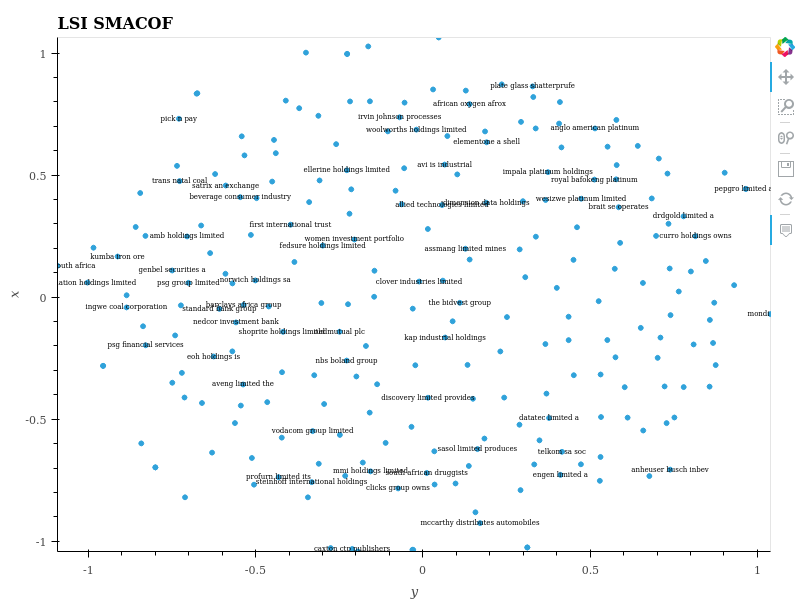

In [7]:
%%opts Scatter [width=800 height=600 tools=['hover']] (size=5)
%%output filename="./media/LSI SMACOF" fig="png"
hv.Scatter(lsi_smacof, vdims=['x', 'companies'],kdims=['y'], label='LSI SMACOF')*functools.reduce(operator.mul,lsi_smacof.sample(frac=0.25).apply(lambda x: hv.Text(x[1], x[0], x[2],fontsize=5),axis=1))

LDA

In [9]:
LDA = make_pipeline(CountVectorizer(), LatentDirichletAllocation(n_components=100))
lda = LDA.fit_transform(description.DESCRIPTION)
lda_d = pairwise_distances(lda,metric='euclidean', n_jobs=-1)

/home/marcussky/.conda/envs/tulip/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [10]:
lda_tsne = pd.DataFrame(TSNE(metric='precomputed').fit_transform(lda_d), columns=['x','y'])
lda_tsne['companies'] = description['NAME']

lda_smacof = pd.DataFrame(smacof(lda_d)[0], columns=['x','y'])
lda_smacof['companies'] = description['NAME']

:Overlay
   .Scatter.LDA_TSNE :Scatter   [y]   (x,companies)
   .Text.I           :Text   [x,y]
   .Text.II          :Text   [x,y]
   .Text.III         :Text   [x,y]
   .Text.IV          :Text   [x,y]
   .Text.V           :Text   [x,y]
   .Text.VI          :Text   [x,y]
   .Text.VII         :Text   [x,y]
   .Text.VIII        :Text   [x,y]
   .Text.IX          :Text   [x,y]
   .Text.X           :Text   [x,y]
   .Text.XI          :Text   [x,y]
   .Text.XII         :Text   [x,y]
   .Text.XIII        :Text   [x,y]
   .Text.XIV         :Text   [x,y]
   .Text.XV          :Text   [x,y]
   .Text.XVI         :Text   [x,y]
   .Text.XVII        :Text   [x,y]
   .Text.XVIII       :Text   [x,y]
   .Text.XIX         :Text   [x,y]
   .Text.XX          :Text   [x,y]
   .Text.XXI         :Text   [x,y]
   .Text.XXII        :Text   [x,y]
   .Text.XXIII       :Text   [x,y]
   .Text.XXIV        :Text   [x,y]
   .Text.XXV         :Text   [x,y]
   .Text.XXVI        :Text   [x,y]
   .Text.XXVII       :Text   [x,y]
   .Text.XXVIII      :Text   [x,y]
   .Text.XXIX        :Text   [x,y]
   .Text.XXX         :Text   [x,y]
   .Text.XXXI        :Text   [x,y]
   .Text.XXXII       :Text   [x,y]
   .Text.XXXIII      :Text   [x,y]
   .Text.XXXIV       :Text   [x,y]
   .Text.XXXV        :Text   [x,y]
   .Text.XXXVI       :Text   [x,y]
   .Text.XXXVII      :Text   [x,y]
   .Text.XXXVIII     :Text   [x,y]
   .Text.XXXIX       :Text   [x,y]
   .Text.XL          :Text   [x,y]
   .Text.XLI         :Text   [x,y]
   .Text.XLII        :Text   [x,y]
   .Text.XLIII       :Text   [x,y]
   .Text.XLIV        :Text   [x,y]
   .Text.XLV         :Text   [x,y]
   .Text.XLVI        :Text   [x,y]
   .Text.XLVII       :Text   [x,y]
   .Text.XLVIII      :Text   [x,y]
   .Text.XLIX        :Text   [x,y]
   .Text.L           :Text   [x,y]
   .Text.LI          :Text   [x,y]
   .Text.LII         :Text   [x,y]
   .Text.LIII        :Text   [x,y]
   .Text.LIV         :Text   [x,y]
   .Text.LV          :Text   [x,y]
   .Text.LVI         :Text   [x,y]
   .Text.LVII        :Text   [x,y]
   .Text.LVIII       :Text   [x,y]
   .Text.LIX         :Text   [x,y]
   .Text.LX          :Text   [x,y]
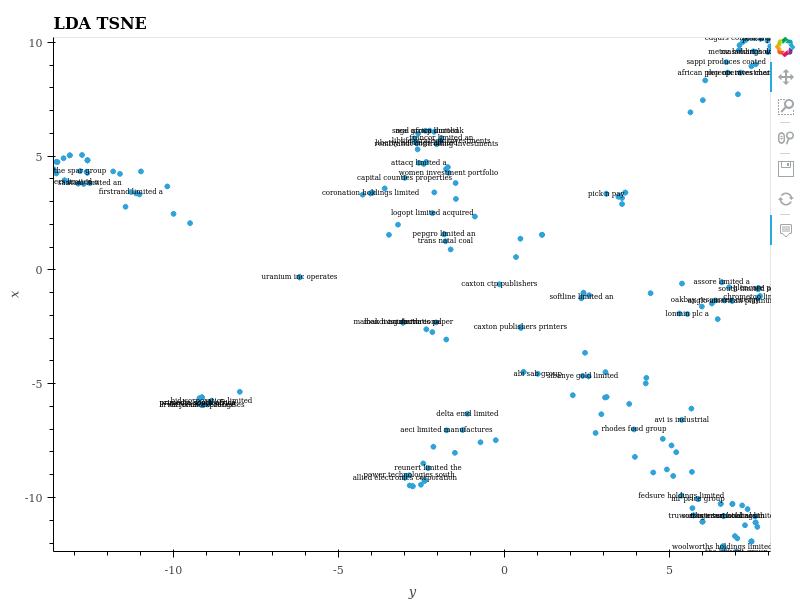

In [374]:
%%opts Scatter [width=800 height=600 tools=['hover']] (size=5)
%%output filename="./media/LDA TSNE" fig="png"
hv.Scatter(lda_tsne, vdims=['x', 'companies'],kdims=['y'], label='LDA TSNE')*functools.reduce(operator.mul,lda_tsne.sample(frac=0.25).apply(lambda x: hv.Text(x[1], x[0], x[2],fontsize=5),axis=1))

:Overlay
   .Scatter.LDA_SMACOF :Scatter   [y]   (x,companies)
   .Text.I             :Text   [x,y]
   .Text.II            :Text   [x,y]
   .Text.III           :Text   [x,y]
   .Text.IV            :Text   [x,y]
   .Text.V             :Text   [x,y]
   .Text.VI            :Text   [x,y]
   .Text.VII           :Text   [x,y]
   .Text.VIII          :Text   [x,y]
   .Text.IX            :Text   [x,y]
   .Text.X             :Text   [x,y]
   .Text.XI            :Text   [x,y]
   .Text.XII           :Text   [x,y]
   .Text.XIII          :Text   [x,y]
   .Text.XIV           :Text   [x,y]
   .Text.XV            :Text   [x,y]
   .Text.XVI           :Text   [x,y]
   .Text.XVII          :Text   [x,y]
   .Text.XVIII         :Text   [x,y]
   .Text.XIX           :Text   [x,y]
   .Text.XX            :Text   [x,y]
   .Text.XXI           :Text   [x,y]
   .Text.XXII          :Text   [x,y]
   .Text.XXIII         :Text   [x,y]
   .Text.XXIV          :Text   [x,y]
   .Text.XXV           :Text   [x,y]
   .Text.XXVI          :Text   [x,y]
   .Text.XXVII         :Text   [x,y]
   .Text.XXVIII        :Text   [x,y]
   .Text.XXIX          :Text   [x,y]
   .Text.XXX           :Text   [x,y]
   .Text.XXXI          :Text   [x,y]
   .Text.XXXII         :Text   [x,y]
   .Text.XXXIII        :Text   [x,y]
   .Text.XXXIV         :Text   [x,y]
   .Text.XXXV          :Text   [x,y]
   .Text.XXXVI         :Text   [x,y]
   .Text.XXXVII        :Text   [x,y]
   .Text.XXXVIII       :Text   [x,y]
   .Text.XXXIX         :Text   [x,y]
   .Text.XL            :Text   [x,y]
   .Text.XLI           :Text   [x,y]
   .Text.XLII          :Text   [x,y]
   .Text.XLIII         :Text   [x,y]
   .Text.XLIV          :Text   [x,y]
   .Text.XLV           :Text   [x,y]
   .Text.XLVI          :Text   [x,y]
   .Text.XLVII         :Text   [x,y]
   .Text.XLVIII        :Text   [x,y]
   .Text.XLIX          :Text   [x,y]
   .Text.L             :Text   [x,y]
   .Text.LI            :Text   [x,y]
   .Text.LII           :Text   [x,y]
   .Text.LIII          :Text   [x,y]
   .Text.LIV           :Text   [x,y]
   .Text.LV            :Text   [x,y]
   .Text.LVI           :Text   [x,y]
   .Text.LVII          :Text   [x,y]
   .Text.LVIII         :Text   [x,y]
   .Text.LIX           :Text   [x,y]
   .Text.LX            :Text   [x,y]
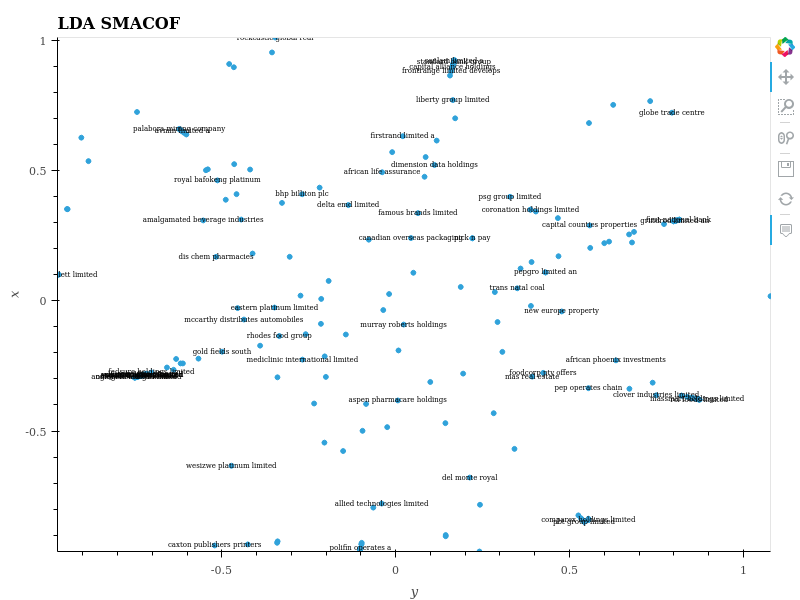

In [375]:
%%opts Scatter [width=800 height=600 tools=['hover']] (size=5)
%%output filename="./media/LDA SMACOF" fig="png"
hv.Scatter(lda_smacof, vdims=['x', 'companies'],kdims=['y'], label='LDA SMACOF')*functools.reduce(operator.mul,lda_smacof.sample(frac=0.25).apply(lambda x: hv.Text(x[1], x[0], x[2],fontsize=5),axis=1))

# Word2Vec

In [25]:
# def Association(doc, vocab, idf):
#     model = Word2Vec(sentences=[doc.split()], min_count=1, workers=3, iter=100)
#     vectors = pd.DataFrame(data=model.wv.vectors, index=model.wv.vocab.keys(), dtype='f8')
#     words = vocab.merge(vectors, how='left', left_on='vocab', right_index=True).drop('vocab', axis=1)
    
#     companies = pd.DataFrame(idf).apply(lambda x: pd.Series(np.multiply(x.values.reshape(-1,1),words).sum(0)), axis=1)
#     distances = pairwise_distances(companies, metric='cosine', n_jobs=-1)
    
#     return distances
def Association(doc, vocab, idf):
    model = Word2Vec(sentences=doc, min_count=1, workers=3, iter=100)
    vectors = pd.DataFrame(data=model.wv.vectors, index=model.wv.vocab.keys(), dtype='f8')
    words = vocab.merge(vectors, how='left', left_on='vocab', right_index=True).drop('vocab', axis=1)
    
    companies = pd.DataFrame(idf).apply(lambda x: pd.Series(np.multiply(x.values.reshape(-1,1),words).sum(0)), axis=1)
    distances = pairwise_distances(companies, metric='cosine', n_jobs=1)
    #portfolios = pd.DataFrame(P).apply(lambda x: (x.values.reshape(-1,1) * x.values.reshape(-1,1).T * distances).sum(), axis=0)
    
    return distances

In [26]:
w_description_path = os.path.join('..','data','Bloomberg_Meta.csv')
w_description = pd.read_csv(w_description_path)
w_description = description.loc[w_description.CODE.str.contains(' SJ Equity'),:]

In [27]:
w_description = w_description.loc[:,'DESCRIPTION'].str.lower().str.replace('[^a-z.]',' ').str.split('.').apply(lambda x: [i.split() for i in x]).sum()

In [28]:
docs = pd.Series(description['DESCRIPTION'].sum())

Word2Vec_TFIDF = TfidfVectorizer()
word2vec_tfidf = Word2Vec_TFIDF.fit_transform(description['DESCRIPTION']).todense()

vocab = pd.DataFrame(Word2Vec_TFIDF.get_feature_names(), columns=['vocab'])

In [ ]:
word2vec_d = pd.Series([w_description]).apply(lambda doc: Association(doc, vocab, word2vec_tfidf))

In [30]:
word2vec_d = pd.DataFrame(word2vec_d[0])

In [31]:
word2vec_tsne = pd.DataFrame(TSNE(metric='precomputed').fit_transform(word2vec_d), columns=['x','y'])
word2vec_tsne['companies'] = description['NAME']

word2vec_smacof = pd.DataFrame(smacof(word2vec_d)[0], columns=['x','y'])
word2vec_smacof['companies'] = description['NAME']

:Overlay
   .Scatter.Word2Vec_TSNE :Scatter   [y]   (x,companies)
   .Text.I                :Text   [x,y]
   .Text.II               :Text   [x,y]
   .Text.III              :Text   [x,y]
   .Text.IV               :Text   [x,y]
   .Text.V                :Text   [x,y]
   .Text.VI               :Text   [x,y]
   .Text.VII              :Text   [x,y]
   .Text.VIII             :Text   [x,y]
   .Text.IX               :Text   [x,y]
   .Text.X                :Text   [x,y]
   .Text.XI               :Text   [x,y]
   .Text.XII              :Text   [x,y]
   .Text.XIII             :Text   [x,y]
   .Text.XIV              :Text   [x,y]
   .Text.XV               :Text   [x,y]
   .Text.XVI              :Text   [x,y]
   .Text.XVII             :Text   [x,y]
   .Text.XVIII            :Text   [x,y]
   .Text.XIX              :Text   [x,y]
   .Text.XX               :Text   [x,y]
   .Text.XXI              :Text   [x,y]
   .Text.XXII             :Text   [x,y]
   .Text.XXIII            :Text   [x,y]
   .Text.XXIV             :Text   [x,y]
   .Text.XXV              :Text   [x,y]
   .Text.XXVI             :Text   [x,y]
   .Text.XXVII            :Text   [x,y]
   .Text.XXVIII           :Text   [x,y]
   .Text.XXIX             :Text   [x,y]
   .Text.XXX              :Text   [x,y]
   .Text.XXXI             :Text   [x,y]
   .Text.XXXII            :Text   [x,y]
   .Text.XXXIII           :Text   [x,y]
   .Text.XXXIV            :Text   [x,y]
   .Text.XXXV             :Text   [x,y]
   .Text.XXXVI            :Text   [x,y]
   .Text.XXXVII           :Text   [x,y]
   .Text.XXXVIII          :Text   [x,y]
   .Text.XXXIX            :Text   [x,y]
   .Text.XL               :Text   [x,y]
   .Text.XLI              :Text   [x,y]
   .Text.XLII             :Text   [x,y]
   .Text.XLIII            :Text   [x,y]
   .Text.XLIV             :Text   [x,y]
   .Text.XLV              :Text   [x,y]
   .Text.XLVI             :Text   [x,y]
   .Text.XLVII            :Text   [x,y]
   .Text.XLVIII           :Text   [x,y]
   .Text.XLIX             :Text   [x,y]
   .Text.L                :Text   [x,y]
   .Text.LI               :Text   [x,y]
   .Text.LII              :Text   [x,y]
   .Text.LIII             :Text   [x,y]
   .Text.LIV              :Text   [x,y]
   .Text.LV               :Text   [x,y]
   .Text.LVI              :Text   [x,y]
   .Text.LVII             :Text   [x,y]
   .Text.LVIII            :Text   [x,y]
   .Text.LIX              :Text   [x,y]
   .Text.LX               :Text   [x,y]
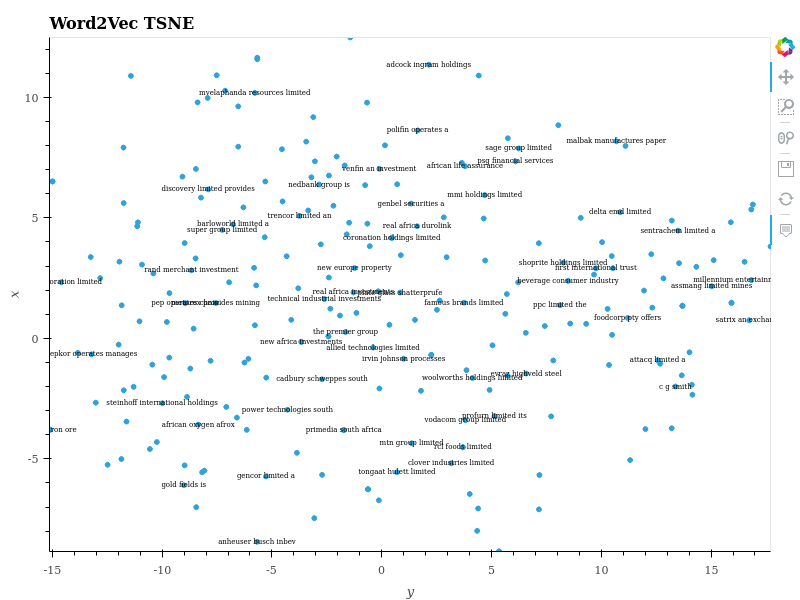

In [76]:
%%opts Scatter [width=800 height=600 tools=['hover']] (size=5)
%%output filename="./media/Word2Vec TSNE" fig="png"
hv.Scatter(word2vec_tsne, vdims=['x', 'companies'],kdims=['y'], label='Word2Vec TSNE')*functools.reduce(operator.mul,word2vec_tsne.sample(frac=0.25).apply(lambda x: hv.Text(x[1], x[0], x[2],fontsize=5),axis=1))

:Overlay
   .Scatter.Word2Vec_SMACOF :Scatter   [y]   (x,companies)
   .Text.I                  :Text   [x,y]
   .Text.II                 :Text   [x,y]
   .Text.III                :Text   [x,y]
   .Text.IV                 :Text   [x,y]
   .Text.V                  :Text   [x,y]
   .Text.VI                 :Text   [x,y]
   .Text.VII                :Text   [x,y]
   .Text.VIII               :Text   [x,y]
   .Text.IX                 :Text   [x,y]
   .Text.X                  :Text   [x,y]
   .Text.XI                 :Text   [x,y]
   .Text.XII                :Text   [x,y]
   .Text.XIII               :Text   [x,y]
   .Text.XIV                :Text   [x,y]
   .Text.XV                 :Text   [x,y]
   .Text.XVI                :Text   [x,y]
   .Text.XVII               :Text   [x,y]
   .Text.XVIII              :Text   [x,y]
   .Text.XIX                :Text   [x,y]
   .Text.XX                 :Text   [x,y]
   .Text.XXI                :Text   [x,y]
   .Text.XXII               :Text   [x,y]
   .Text.XXIII              :Text   [x,y]
   .Text.XXIV               :Text   [x,y]
   .Text.XXV                :Text   [x,y]
   .Text.XXVI               :Text   [x,y]
   .Text.XXVII              :Text   [x,y]
   .Text.XXVIII             :Text   [x,y]
   .Text.XXIX               :Text   [x,y]
   .Text.XXX                :Text   [x,y]
   .Text.XXXI               :Text   [x,y]
   .Text.XXXII              :Text   [x,y]
   .Text.XXXIII             :Text   [x,y]
   .Text.XXXIV              :Text   [x,y]
   .Text.XXXV               :Text   [x,y]
   .Text.XXXVI              :Text   [x,y]
   .Text.XXXVII             :Text   [x,y]
   .Text.XXXVIII            :Text   [x,y]
   .Text.XXXIX              :Text   [x,y]
   .Text.XL                 :Text   [x,y]
   .Text.XLI                :Text   [x,y]
   .Text.XLII               :Text   [x,y]
   .Text.XLIII              :Text   [x,y]
   .Text.XLIV               :Text   [x,y]
   .Text.XLV                :Text   [x,y]
   .Text.XLVI               :Text   [x,y]
   .Text.XLVII              :Text   [x,y]
   .Text.XLVIII             :Text   [x,y]
   .Text.XLIX               :Text   [x,y]
   .Text.L                  :Text   [x,y]
   .Text.LI                 :Text   [x,y]
   .Text.LII                :Text   [x,y]
   .Text.LIII               :Text   [x,y]
   .Text.LIV                :Text   [x,y]
   .Text.LV                 :Text   [x,y]
   .Text.LVI                :Text   [x,y]
   .Text.LVII               :Text   [x,y]
   .Text.LVIII              :Text   [x,y]
   .Text.LIX                :Text   [x,y]
   .Text.LX                 :Text   [x,y]
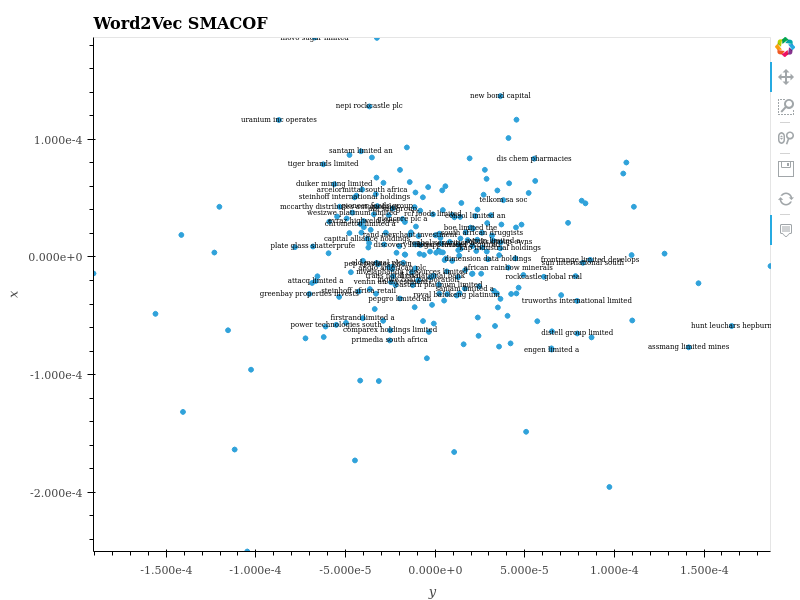

In [75]:
%%opts Scatter [width=800 height=600 tools=['hover']] (size=5)
%%output filename="./media/Word2Vec SMACOF" fig="png"
hv.Scatter(word2vec_smacof, vdims=['x', 'companies'],kdims=['y'], label='Word2Vec SMACOF')*functools.reduce(operator.mul,word2vec_smacof.sample(frac=0.25).apply(lambda x: hv.Text(x[1], x[0], x[2],fontsize=5),axis=1))

Doc2Vec

In [ ]:
Doc2Vec =  sklearn_api.d2vmodel.D2VTransformer(size=100, iter=100)
doc2vec = Doc2Vec.fit_transform(X=description['DESCRIPTION'].str.split().tolist())
doc2vec_d = pairwise_distances(doc2vec,metric='cosine', n_jobs=-1)

In [127]:
doc2vec_tsne = pd.DataFrame(TSNE(metric='precomputed').fit_transform(doc2vec_d), columns=['x','y'])
doc2vec_tsne['companies'] = description['NAME']

doc2vec_smacof = pd.DataFrame(smacof(doc2vec_d)[0], columns=['x','y'])
doc2vec_smacof['companies'] = description['NAME']

:Overlay
   .Scatter.Doc2Vec_TSNE :Scatter   [y]   (x,companies)
   .Text.I               :Text   [x,y]
   .Text.II              :Text   [x,y]
   .Text.III             :Text   [x,y]
   .Text.IV              :Text   [x,y]
   .Text.V               :Text   [x,y]
   .Text.VI              :Text   [x,y]
   .Text.VII             :Text   [x,y]
   .Text.VIII            :Text   [x,y]
   .Text.IX              :Text   [x,y]
   .Text.X               :Text   [x,y]
   .Text.XI              :Text   [x,y]
   .Text.XII             :Text   [x,y]
   .Text.XIII            :Text   [x,y]
   .Text.XIV             :Text   [x,y]
   .Text.XV              :Text   [x,y]
   .Text.XVI             :Text   [x,y]
   .Text.XVII            :Text   [x,y]
   .Text.XVIII           :Text   [x,y]
   .Text.XIX             :Text   [x,y]
   .Text.XX              :Text   [x,y]
   .Text.XXI             :Text   [x,y]
   .Text.XXII            :Text   [x,y]
   .Text.XXIII           :Text   [x,y]
   .Text.XXIV            :Text   [x,y]
   .Text.XXV             :Text   [x,y]
   .Text.XXVI            :Text   [x,y]
   .Text.XXVII           :Text   [x,y]
   .Text.XXVIII          :Text   [x,y]
   .Text.XXIX            :Text   [x,y]
   .Text.XXX             :Text   [x,y]
   .Text.XXXI            :Text   [x,y]
   .Text.XXXII           :Text   [x,y]
   .Text.XXXIII          :Text   [x,y]
   .Text.XXXIV           :Text   [x,y]
   .Text.XXXV            :Text   [x,y]
   .Text.XXXVI           :Text   [x,y]
   .Text.XXXVII          :Text   [x,y]
   .Text.XXXVIII         :Text   [x,y]
   .Text.XXXIX           :Text   [x,y]
   .Text.XL              :Text   [x,y]
   .Text.XLI             :Text   [x,y]
   .Text.XLII            :Text   [x,y]
   .Text.XLIII           :Text   [x,y]
   .Text.XLIV            :Text   [x,y]
   .Text.XLV             :Text   [x,y]
   .Text.XLVI            :Text   [x,y]
   .Text.XLVII           :Text   [x,y]
   .Text.XLVIII          :Text   [x,y]
   .Text.XLIX            :Text   [x,y]
   .Text.L               :Text   [x,y]
   .Text.LI              :Text   [x,y]
   .Text.LII             :Text   [x,y]
   .Text.LIII            :Text   [x,y]
   .Text.LIV             :Text   [x,y]
   .Text.LV              :Text   [x,y]
   .Text.LVI             :Text   [x,y]
   .Text.LVII            :Text   [x,y]
   .Text.LVIII           :Text   [x,y]
   .Text.LIX             :Text   [x,y]
   .Text.LX              :Text   [x,y]
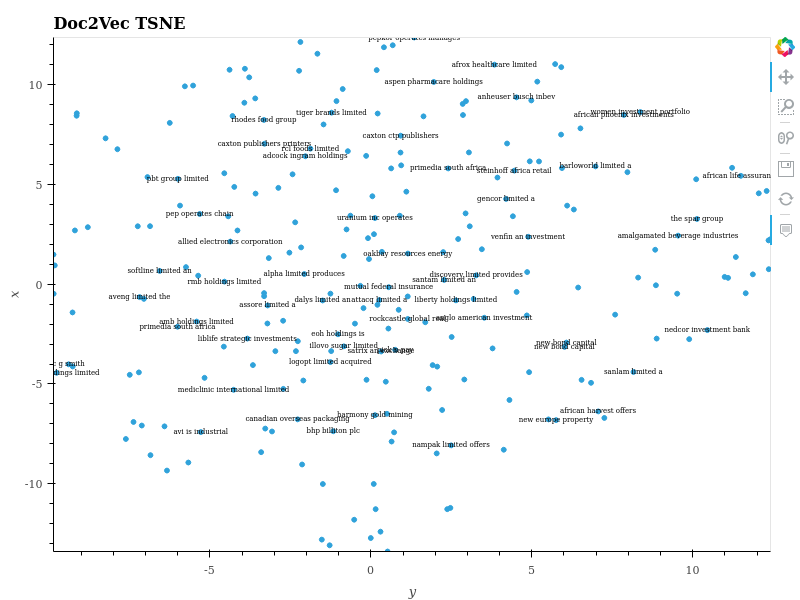

In [378]:
%%opts Scatter [width=800 height=600 tools=['hover']] (size=5)
%%output filename="./media/Doc2Vec TSNE" fig="png"

hv.Scatter(doc2vec_tsne, vdims=['x', 'companies'],kdims=['y'], label='Doc2Vec TSNE')*functools.reduce(operator.mul,doc2vec_tsne.sample(frac=0.25).apply(lambda x: hv.Text(x[1], x[0], x[2],fontsize=5),axis=1))

:Overlay
   .Scatter.Doc2Vec_SMACOF :Scatter   [y]   (x,companies)
   .Text.I                 :Text   [x,y]
   .Text.II                :Text   [x,y]
   .Text.III               :Text   [x,y]
   .Text.IV                :Text   [x,y]
   .Text.V                 :Text   [x,y]
   .Text.VI                :Text   [x,y]
   .Text.VII               :Text   [x,y]
   .Text.VIII              :Text   [x,y]
   .Text.IX                :Text   [x,y]
   .Text.X                 :Text   [x,y]
   .Text.XI                :Text   [x,y]
   .Text.XII               :Text   [x,y]
   .Text.XIII              :Text   [x,y]
   .Text.XIV               :Text   [x,y]
   .Text.XV                :Text   [x,y]
   .Text.XVI               :Text   [x,y]
   .Text.XVII              :Text   [x,y]
   .Text.XVIII             :Text   [x,y]
   .Text.XIX               :Text   [x,y]
   .Text.XX                :Text   [x,y]
   .Text.XXI               :Text   [x,y]
   .Text.XXII              :Text   [x,y]
   .Text.XXIII             :Text   [x,y]
   .Text.XXIV              :Text   [x,y]
   .Text.XXV               :Text   [x,y]
   .Text.XXVI              :Text   [x,y]
   .Text.XXVII             :Text   [x,y]
   .Text.XXVIII            :Text   [x,y]
   .Text.XXIX              :Text   [x,y]
   .Text.XXX               :Text   [x,y]
   .Text.XXXI              :Text   [x,y]
   .Text.XXXII             :Text   [x,y]
   .Text.XXXIII            :Text   [x,y]
   .Text.XXXIV             :Text   [x,y]
   .Text.XXXV              :Text   [x,y]
   .Text.XXXVI             :Text   [x,y]
   .Text.XXXVII            :Text   [x,y]
   .Text.XXXVIII           :Text   [x,y]
   .Text.XXXIX             :Text   [x,y]
   .Text.XL                :Text   [x,y]
   .Text.XLI               :Text   [x,y]
   .Text.XLII              :Text   [x,y]
   .Text.XLIII             :Text   [x,y]
   .Text.XLIV              :Text   [x,y]
   .Text.XLV               :Text   [x,y]
   .Text.XLVI              :Text   [x,y]
   .Text.XLVII             :Text   [x,y]
   .Text.XLVIII            :Text   [x,y]
   .Text.XLIX              :Text   [x,y]
   .Text.L                 :Text   [x,y]
   .Text.LI                :Text   [x,y]
   .Text.LII               :Text   [x,y]
   .Text.LIII              :Text   [x,y]
   .Text.LIV               :Text   [x,y]
   .Text.LV                :Text   [x,y]
   .Text.LVI               :Text   [x,y]
   .Text.LVII              :Text   [x,y]
   .Text.LVIII             :Text   [x,y]
   .Text.LIX               :Text   [x,y]
   .Text.LX                :Text   [x,y]
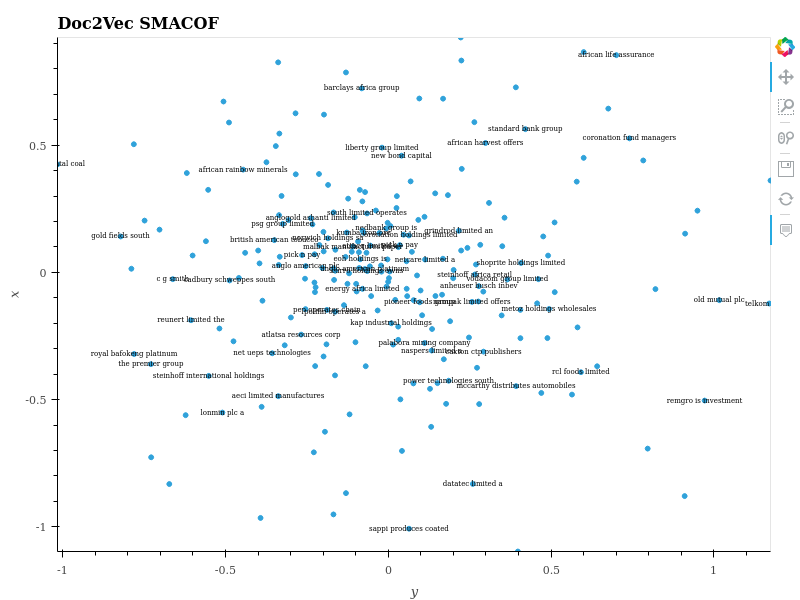

In [379]:
%%opts Scatter [width=800 height=600 tools=['hover']] (size=5)
%%output filename="./media/Doc2Vec SMACOF" fig="png"
hv.Scatter(doc2vec_smacof, vdims=['x', 'companies'],kdims=['y'], label='Doc2Vec SMACOF')*functools.reduce(operator.mul,doc2vec_smacof.sample(frac=0.25).apply(lambda x: hv.Text(x[1], x[0], x[2],fontsize=5),axis=1))

# Portfolios

In [10]:
# def Association(doc, vocab, idf):
#     model = Word2Vec(sentences=[doc.split()], min_count=1, workers=3, iter=100)
#     vectors = pd.DataFrame(data=model.wv.vectors, index=model.wv.vocab.keys(), dtype='f8')
#     words = vocab.merge(vectors, how='left', left_on='vocab', right_index=True).drop('vocab', axis=1)
    
#     companies = pd.DataFrame(idf).apply(lambda x: pd.Series(np.multiply(x.values.reshape(-1,1),words).sum(0)), axis=1)
#     distances = pairwise_distances(companies, metric='cosine', n_jobs=-1)
    
#     return distances
def Association(doc, vocab, P, idf):
    model = Word2Vec(sentences=[doc.split()], min_count=1, workers=3, iter=100)
    vectors = pd.DataFrame(data=model.wv.vectors, index=model.wv.vocab.keys(), dtype='f8')
    words = vocab.merge(vectors, how='left', left_on='vocab', right_index=True).drop('vocab', axis=1)
    
    companies = pd.DataFrame(idf).apply(lambda x: pd.Series(np.multiply(x.values.reshape(-1,1),words).sum(0)), axis=1)
    distances = pairwise_distances(companies, metric='cosine', n_jobs=1)
    portfolios = pd.DataFrame(P).apply(lambda x: (x.values.reshape(-1,1) * x.values.reshape(-1,1).T * distances).sum(), axis=0)
    
    return pd.Series(portfolios)

In [11]:
docs = pd.Series(description['DESCRIPTION'].sum())

Word2Vec_TFIDF = TfidfVectorizer()
word2vec_tfidf = Word2Vec_TFIDF.fit_transform(description['DESCRIPTION']).todense()

vocab = pd.DataFrame(Word2Vec_TFIDF.get_feature_names(), columns=['vocab'])

In [12]:
#docs = pd.concat([docs, docs])

In [18]:
ass = docs.apply(lambda doc: Association(doc, vocab, P, word2vec_tfidf))

#word2vec_d = ass[0]

INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 91 : training on 6168 raw words (4593 effective words) took 0.0s, 455380 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 92 : training on 6168 raw words (4640 effective words) took 0.0s, 470371 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models

In [19]:
def RandomPortolio(stocks=174, size=10, samples=5000, p=None):
    E = np.zeros((stocks,samples), dtype='f8')
    
    for j in range(samples):
        E[ np.random.choice(stocks, size, replace=False, p=None) , j] = 1
    
    return E

In [20]:
P = RandomPortolio(stocks=239, size=15, samples=5000, p=None)

In [21]:
ass.index = ['Association', 'Association']

:Histogram   [Association]   (Association_frequency)
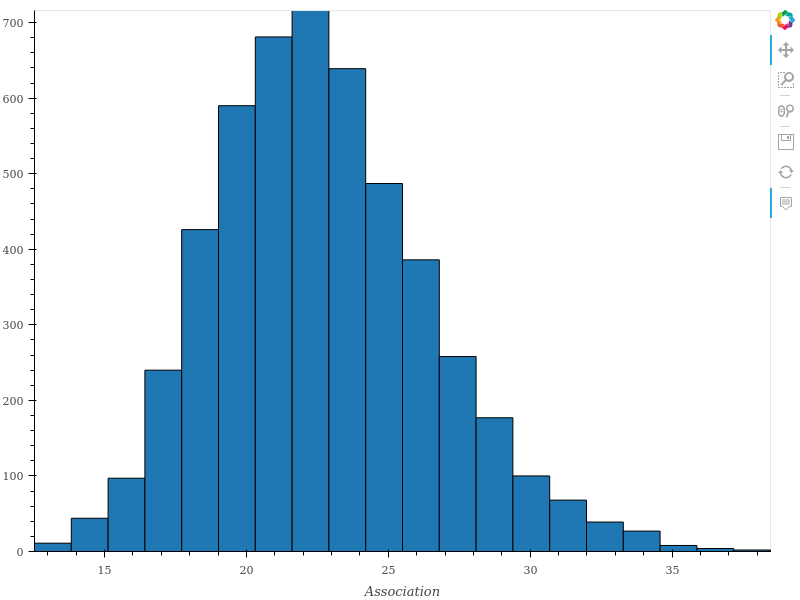

In [22]:
%%opts Histogram [width=800 height=600 tools=['hover']]
%%output filename="./media/Benchmark Association Distibution" fig="png"
ass.iloc[0].hvplot.hist()

# Graph Example

In [32]:
C = np.random.choice(list(range(word2vec_tsne.shape[0])), size=5, replace=False)

edges_df = np.array([np.tile(C, 15).tolist(), np.repeat(C,15, axis=0).tolist()]).T

nodes = word2vec_tsne.loc[:,['x','y']].reset_index()

nodes = nodes.iloc[:,[1,2,0]]

In [65]:
nodes = hv.Nodes(nodes)
graph = hv.Graph((edges_df, nodes)).options(node_size=5,width=1000,height=800)

:Overlay
   .Scatter.Doc2Vec_TSNE_Portfolio :Scatter   [x]   (y,companies)
   .Graph.I                        :Graph   [start,end]
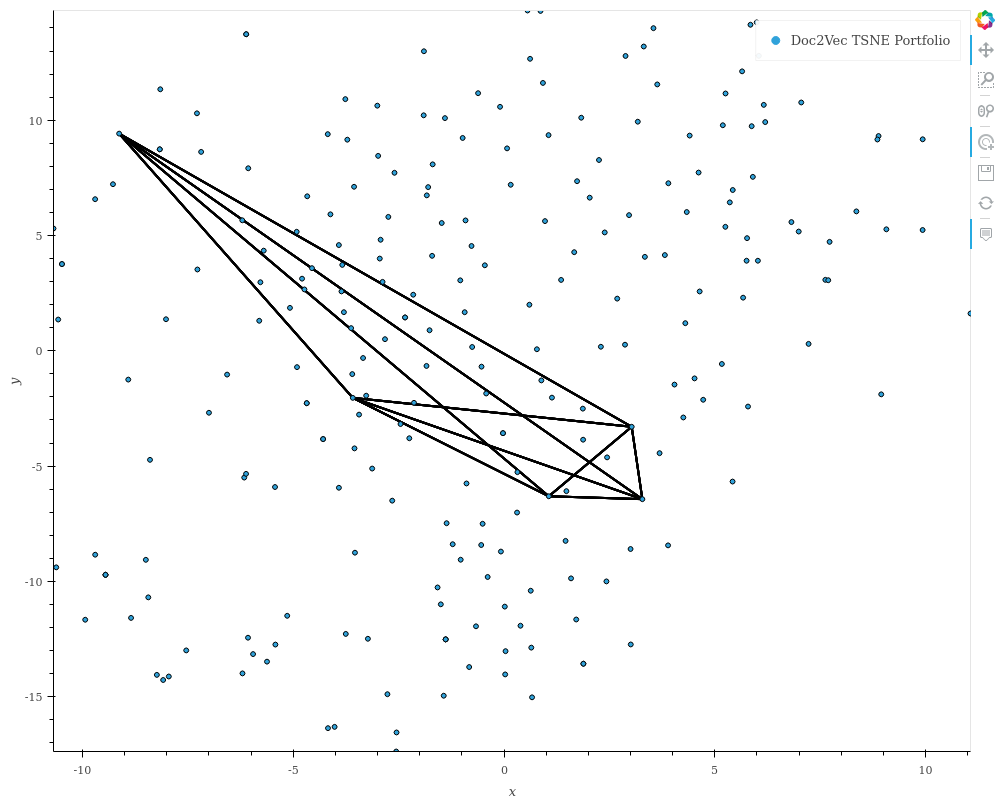

In [35]:
%%output filename="./media/Association Computation Diagram" fig="png"
hv.Scatter(word2vec_tsne, vdims=['y', 'companies'],kdims=['x'], label='Doc2Vec TSNE Portfolio') * \
graph